In [1]:
import pandas as pd
import numpy as np

# Visualizations
import matplotlib.pyplot as plt

In [2]:
product_reviews = pd.read_csv('datasets/sample30.csv')

In [3]:
product_reviews.head()

,id,brand,categories,manufacturer,name,reviews_date,reviews_didPurchase,reviews_doRecommend,reviews_rating,reviews_text,reviews_title,reviews_userCity,reviews_userProvince,reviews_username,user_sentiment
0,AV13O1A8GV-KLJ3akUyj,Universal Music,"Movies, Music & Books,Music,R&b,Movies & TV,Mo...",Universal Music Group / Cash Money,Pink Friday: Roman Reloaded Re-Up (w/dvd),2012-11-30T06:21:45.000Z,NaN,NaN,5,i love this album. it's very good. more to the...,Just Awesome,Los Angeles,NaN,joshua,Positive
1,AV14LG0R-jtxr-f38QfS,Lundberg,"Food,Packaged Foods,Snacks,Crackers,Snacks, Co...",Lundberg,Lundberg Organic Cinnamon Toast Rice Cakes,2017-07-09T00:00:00.000Z,True,NaN,5,Good flavor. This review was collected as part...,Good,NaN,NaN,dorothy w,Positive
2,AV14LG0R-jtxr-f38QfS,Lundberg,"Food,Packaged Foods,Snacks,Crackers,Snacks, Co...",Lundberg,Lundberg Organic Cinnamon Toast Rice Cakes,2017-07-09T00:00:00.000Z,True,NaN,5,Good flavor.,Good,NaN,NaN,dorothy w,Positive
3,AV16khLE-jtxr-f38VFn,K-Y,"Personal Care,Medicine Cabinet,Lubricant/Sperm...",K-Y,K-Y Love Sensuality Pleasure Gel,2016-01-06T00:00:00.000Z,False,False,1,I read through the reviews on here before look...,Disappointed,NaN,NaN,rebecca,Negative
4,AV16khLE-jtxr-f38VFn,K-Y,"Personal Care,Medicine Cabinet,Lubricant/Sperm...",K-Y,K-Y Love Sensuality Pleasure Gel,2016-12-21T00:00:00.000Z,False,False,1,My husband bought this gel for us. The gel cau...,Irritation,NaN,NaN,walker557,Negative


In [4]:
product_reviews.shape

(30000, 15)

In [5]:
product_reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   id                    30000 non-null  object
 1   brand                 30000 non-null  object
 2   categories            30000 non-null  object
 3   manufacturer          29859 non-null  object
 4   name                  30000 non-null  object
 5   reviews_date          29954 non-null  object
 6   reviews_didPurchase   15932 non-null  object
 7   reviews_doRecommend   27430 non-null  object
 8   reviews_rating        30000 non-null  int64 
 9   reviews_text          30000 non-null  object
 10  reviews_title         29810 non-null  object
 11  reviews_userCity      1929 non-null   object
 12  reviews_userProvince  170 non-null    object
 13  reviews_username      29937 non-null  object
 14  user_sentiment        29999 non-null  object
dtypes: int64(1), object(14)
memory usage

In [6]:
##########################################
## CHECKING FOR MISSING VALUES
##########################################

product_reviews.isnull().sum()

id                          0
brand                       0
categories                  0
manufacturer              141
name                        0
reviews_date               46
reviews_didPurchase     14068
reviews_doRecommend      2570
reviews_rating              0
reviews_text                0
reviews_title             190
reviews_userCity        28071
reviews_userProvince    29830
reviews_username           63
user_sentiment              1
dtype: int64

In [7]:
product_reviews['reviews_date'].replace({' hooks slide or swivel into any desired position."': '2014-01-06T00:00:00.000Z'}, inplace=True)

In [8]:
##########################################
## CONCATENATE REVIEWTEXT AND SUMMARY 
##########################################

product_reviews['review_text'] = product_reviews[['reviews_title', 'reviews_text']].apply(lambda x: " ".join(str(y) for y in x if str(y) != 'nan'), axis = 1)
product_reviews_hp4 = product_reviews.drop(['reviews_text', 'reviews_title'], axis = 1)
product_reviews_hp4.head()

,id,brand,categories,manufacturer,name,reviews_date,reviews_didPurchase,reviews_doRecommend,reviews_rating,reviews_userCity,reviews_userProvince,reviews_username,user_sentiment,review_text
0,AV13O1A8GV-KLJ3akUyj,Universal Music,"Movies, Music & Books,Music,R&b,Movies & TV,Mo...",Universal Music Group / Cash Money,Pink Friday: Roman Reloaded Re-Up (w/dvd),2012-11-30T06:21:45.000Z,NaN,NaN,5,Los Angeles,NaN,joshua,Positive,Just Awesome i love this album. it's very good...
1,AV14LG0R-jtxr-f38QfS,Lundberg,"Food,Packaged Foods,Snacks,Crackers,Snacks, Co...",Lundberg,Lundberg Organic Cinnamon Toast Rice Cakes,2017-07-09T00:00:00.000Z,True,NaN,5,NaN,NaN,dorothy w,Positive,Good Good flavor. This review was collected as...
2,AV14LG0R-jtxr-f38QfS,Lundberg,"Food,Packaged Foods,Snacks,Crackers,Snacks, Co...",Lundberg,Lundberg Organic Cinnamon Toast Rice Cakes,2017-07-09T00:00:00.000Z,True,NaN,5,NaN,NaN,dorothy w,Positive,Good Good flavor.
3,AV16khLE-jtxr-f38VFn,K-Y,"Personal Care,Medicine Cabinet,Lubricant/Sperm...",K-Y,K-Y Love Sensuality Pleasure Gel,2016-01-06T00:00:00.000Z,False,False,1,NaN,NaN,rebecca,Negative,Disappointed I read through the reviews on her...
4,AV16khLE-jtxr-f38VFn,K-Y,"Personal Care,Medicine Cabinet,Lubricant/Sperm...",K-Y,K-Y Love Sensuality Pleasure Gel,2016-12-21T00:00:00.000Z,False,False,1,NaN,NaN,walker557,Negative,Irritation My husband bought this gel for us. ...


In [9]:

##########################################
# checking duplicates based on'id', 'reviewName' and 'unixReviewTime'columns
##########################################


product_reviews_hp4[product_reviews_hp4.duplicated(['reviews_username','reviews_date','id'],keep= False)]

,id,brand,categories,manufacturer,name,reviews_date,reviews_didPurchase,reviews_doRecommend,reviews_rating,reviews_userCity,reviews_userProvince,reviews_username,user_sentiment,review_text
1,AV14LG0R-jtxr-f38QfS,Lundberg,"Food,Packaged Foods,Snacks,Crackers,Snacks, Co...",Lundberg,Lundberg Organic Cinnamon Toast Rice Cakes,2017-07-09T00:00:00.000Z,True,NaN,5,NaN,NaN,dorothy w,Positive,Good Good flavor. This review was collected as...
2,AV14LG0R-jtxr-f38QfS,Lundberg,"Food,Packaged Foods,Snacks,Crackers,Snacks, Co...",Lundberg,Lundberg Organic Cinnamon Toast Rice Cakes,2017-07-09T00:00:00.000Z,True,NaN,5,NaN,NaN,dorothy w,Positive,Good Good flavor.
10,AV16khLE-jtxr-f38VFn,K-Y,"Personal Care,Medicine Cabinet,Lubricant/Sperm...",K-Y,K-Y Love Sensuality Pleasure Gel,2016-04-08T00:00:00.000Z,False,False,1,NaN,NaN,jds1992,Negative,pretty dissapoitned tried it with my husband a...
12,AV16khLE-jtxr-f38VFn,K-Y,"Personal Care,Medicine Cabinet,Lubricant/Sperm...",K-Y,K-Y Love Sensuality Pleasure Gel,2016-04-08T00:00:00.000Z,False,False,1,NaN,NaN,jds1992,Negative,waste of money Bought this to enhance our time...
67,AV1l8zRZvKc47QAVhnAv,Olay,"Personal Care,Skin Care,Anti-Aging,Beauty,Face...",P&G,Olay Regenerist Deep Hydration Regenerating Cream,2016-04-30T03:08:38.000Z,NaN,True,3,Brooklyn,NaN,mylifeinheels,Positive,Why No Fragrance-Free Formula Today is my firs...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28353,AVpfRTh1ilAPnD_xYic2,Disney,"Movies, Music & Books,Movies,Kids' & Family,Wa...",Walt Disney,Planes: Fire Rescue (2 Discs) (includes Digita...,2014-12-15T00:00:00.000Z,NaN,True,5,NaN,NaN,germz7,Positive,Great gift for the kiddos We got this for my f...
28355,AVpfRTh1ilAPnD_xYic2,Disney,"Movies, Music & Books,Movies,Kids' & Family,Wa...",Walt Disney,Planes: Fire Rescue (2 Discs) (includes Digita...,2014-11-07T00:00:00.000Z,NaN,True,5,NaN,NaN,nevergivnup,Positive,loved it better than the first Family loved th...
28356,AVpfRTh1ilAPnD_xYic2,Disney,"Movies, Music & Books,Movies,Kids' & Family,Wa...",Walt Disney,Planes: Fire Rescue (2 Discs) (includes Digita...,2014-11-07T00:00:00.000Z,NaN,True,5,NaN,NaN,electrotnicjunky,Positive,Flying higher than the first. When I heard of ...
29065,AVpfW8y_LJeJML437ySW,L'oreal Paris,"Beauty,Hair Care,Shampoo & Conditioner,Holiday...",L'oreal Paris,L'or233al Paris Elvive Extraordinary Clay Reba...,2017-01-10T00:13:52.000Z,NaN,True,4,NaN,NaN,chicagojessica,Positive,Soft Hair *i received this product for free in...


In [10]:
condition1 = product_reviews_hp4['user_sentiment'].isnull()
condition2 = product_reviews_hp4['reviews_rating'] == 5
product_reviews_hp4['user_sentiment'] = np.where(condition1 & condition2, 'Positive', product_reviews_hp4['user_sentiment'])

In [11]:
condition1 = product_reviews_hp4['reviews_didPurchase'].isnull()
condition2 = product_reviews_hp4['user_sentiment'] == 'Positive'
product_reviews_hp4['reviews_didPurchase'] = np.where(condition1 & condition2, 'True', 'False')
product_reviews_hp4.reviews_doRecommend.fillna(product_reviews_hp4.reviews_didPurchase, inplace=True)
product_reviews_hp4.head()

,id,brand,categories,manufacturer,name,reviews_date,reviews_didPurchase,reviews_doRecommend,reviews_rating,reviews_userCity,reviews_userProvince,reviews_username,user_sentiment,review_text
0,AV13O1A8GV-KLJ3akUyj,Universal Music,"Movies, Music & Books,Music,R&b,Movies & TV,Mo...",Universal Music Group / Cash Money,Pink Friday: Roman Reloaded Re-Up (w/dvd),2012-11-30T06:21:45.000Z,True,True,5,Los Angeles,NaN,joshua,Positive,Just Awesome i love this album. it's very good...
1,AV14LG0R-jtxr-f38QfS,Lundberg,"Food,Packaged Foods,Snacks,Crackers,Snacks, Co...",Lundberg,Lundberg Organic Cinnamon Toast Rice Cakes,2017-07-09T00:00:00.000Z,False,False,5,NaN,NaN,dorothy w,Positive,Good Good flavor. This review was collected as...
2,AV14LG0R-jtxr-f38QfS,Lundberg,"Food,Packaged Foods,Snacks,Crackers,Snacks, Co...",Lundberg,Lundberg Organic Cinnamon Toast Rice Cakes,2017-07-09T00:00:00.000Z,False,False,5,NaN,NaN,dorothy w,Positive,Good Good flavor.
3,AV16khLE-jtxr-f38VFn,K-Y,"Personal Care,Medicine Cabinet,Lubricant/Sperm...",K-Y,K-Y Love Sensuality Pleasure Gel,2016-01-06T00:00:00.000Z,False,False,1,NaN,NaN,rebecca,Negative,Disappointed I read through the reviews on her...
4,AV16khLE-jtxr-f38VFn,K-Y,"Personal Care,Medicine Cabinet,Lubricant/Sperm...",K-Y,K-Y Love Sensuality Pleasure Gel,2016-12-21T00:00:00.000Z,False,False,1,NaN,NaN,walker557,Negative,Irritation My husband bought this gel for us. ...


In [12]:
product_reviews_hp4.isnull().sum()

id                          0
brand                       0
categories                  0
manufacturer              141
name                        0
reviews_date               46
reviews_didPurchase         0
reviews_doRecommend         0
reviews_rating              0
reviews_userCity        28071
reviews_userProvince    29830
reviews_username           63
user_sentiment              0
review_text                 0
dtype: int64

In [13]:
product_reviews_hp4.drop(['reviews_userProvince', 'reviews_userCity'], axis=1, inplace=True)

In [14]:
product_reviews_hp4.head()

,id,brand,categories,manufacturer,name,reviews_date,reviews_didPurchase,reviews_doRecommend,reviews_rating,reviews_username,user_sentiment,review_text
0,AV13O1A8GV-KLJ3akUyj,Universal Music,"Movies, Music & Books,Music,R&b,Movies & TV,Mo...",Universal Music Group / Cash Money,Pink Friday: Roman Reloaded Re-Up (w/dvd),2012-11-30T06:21:45.000Z,True,True,5,joshua,Positive,Just Awesome i love this album. it's very good...
1,AV14LG0R-jtxr-f38QfS,Lundberg,"Food,Packaged Foods,Snacks,Crackers,Snacks, Co...",Lundberg,Lundberg Organic Cinnamon Toast Rice Cakes,2017-07-09T00:00:00.000Z,False,False,5,dorothy w,Positive,Good Good flavor. This review was collected as...
2,AV14LG0R-jtxr-f38QfS,Lundberg,"Food,Packaged Foods,Snacks,Crackers,Snacks, Co...",Lundberg,Lundberg Organic Cinnamon Toast Rice Cakes,2017-07-09T00:00:00.000Z,False,False,5,dorothy w,Positive,Good Good flavor.
3,AV16khLE-jtxr-f38VFn,K-Y,"Personal Care,Medicine Cabinet,Lubricant/Sperm...",K-Y,K-Y Love Sensuality Pleasure Gel,2016-01-06T00:00:00.000Z,False,False,1,rebecca,Negative,Disappointed I read through the reviews on her...
4,AV16khLE-jtxr-f38VFn,K-Y,"Personal Care,Medicine Cabinet,Lubricant/Sperm...",K-Y,K-Y Love Sensuality Pleasure Gel,2016-12-21T00:00:00.000Z,False,False,1,walker557,Negative,Irritation My husband bought this gel for us. ...


In [15]:
product_reviews_hp4.isnull().sum()

id                       0
brand                    0
categories               0
manufacturer           141
name                     0
reviews_date            46
reviews_didPurchase      0
reviews_doRecommend      0
reviews_rating           0
reviews_username        63
user_sentiment           0
review_text              0
dtype: int64

In [16]:
##########################################
## FILLING NULL VALUES IN BRAND NAME WITH FIRST WORD FROM TITLE
##########################################

product_reviews_hp4.loc[product_reviews_hp4.manufacturer.isnull(),'manufacturer'] = product_reviews_hp4.name.str.split().str.get(0)
product_reviews_hp4.head()

,id,brand,categories,manufacturer,name,reviews_date,reviews_didPurchase,reviews_doRecommend,reviews_rating,reviews_username,user_sentiment,review_text
0,AV13O1A8GV-KLJ3akUyj,Universal Music,"Movies, Music & Books,Music,R&b,Movies & TV,Mo...",Universal Music Group / Cash Money,Pink Friday: Roman Reloaded Re-Up (w/dvd),2012-11-30T06:21:45.000Z,True,True,5,joshua,Positive,Just Awesome i love this album. it's very good...
1,AV14LG0R-jtxr-f38QfS,Lundberg,"Food,Packaged Foods,Snacks,Crackers,Snacks, Co...",Lundberg,Lundberg Organic Cinnamon Toast Rice Cakes,2017-07-09T00:00:00.000Z,False,False,5,dorothy w,Positive,Good Good flavor. This review was collected as...
2,AV14LG0R-jtxr-f38QfS,Lundberg,"Food,Packaged Foods,Snacks,Crackers,Snacks, Co...",Lundberg,Lundberg Organic Cinnamon Toast Rice Cakes,2017-07-09T00:00:00.000Z,False,False,5,dorothy w,Positive,Good Good flavor.
3,AV16khLE-jtxr-f38VFn,K-Y,"Personal Care,Medicine Cabinet,Lubricant/Sperm...",K-Y,K-Y Love Sensuality Pleasure Gel,2016-01-06T00:00:00.000Z,False,False,1,rebecca,Negative,Disappointed I read through the reviews on her...
4,AV16khLE-jtxr-f38VFn,K-Y,"Personal Care,Medicine Cabinet,Lubricant/Sperm...",K-Y,K-Y Love Sensuality Pleasure Gel,2016-12-21T00:00:00.000Z,False,False,1,walker557,Negative,Irritation My husband bought this gel for us. ...


In [17]:
##########################################
## CHECKING FOR MISSING VALUES
##########################################

product_reviews_hp4.isnull().sum()

id                      0
brand                   0
categories              0
manufacturer            0
name                    0
reviews_date           46
reviews_didPurchase     0
reviews_doRecommend     0
reviews_rating          0
reviews_username       63
user_sentiment          0
review_text             0
dtype: int64

In [18]:
##########################################
## DROPPING NULL VALUE COLUMNS
##########################################

product_reviews_hp4=product_reviews_hp4.dropna(subset=['reviews_username','reviews_date'])

In [19]:
##########################################
# Drop 'reviewName' and 'unixReviewTime'columns
##########################################

product_reviews_hp4 = product_reviews_hp4.drop_duplicates(['id','reviews_username', 'reviews_date'], keep = 'first')

In [20]:
##########################################
## FINAL CHECKING FOR MISSING VALUES
##########################################

product_reviews_hp4.isnull().sum()


id                     0
brand                  0
categories             0
manufacturer           0
name                   0
reviews_date           0
reviews_didPurchase    0
reviews_doRecommend    0
reviews_rating         0
reviews_username       0
user_sentiment         0
review_text            0
dtype: int64

In [21]:
product_reviews_hp4.shape

(29742, 12)

In [22]:
##########################################
## DESCRIPTIVE STATISTICS
##########################################

print ("================================================")

### Total reviews
total = len(product_reviews_hp4)
print ("Number of reviews: ",total)
print ()

### How many unique reviewers?
print ("Number of unique reviewers: ",len(product_reviews_hp4.reviews_username.unique()))
reviewer_prop = float(len(product_reviews_hp4.reviews_username.unique())/total)
print ("Prop of unique reviewers: ",round(reviewer_prop,3))
print ()

### How many unique products?
print ("Number of unique products: ", len(product_reviews_hp4.id.unique()))
product_prop = float(len(product_reviews_hp4.id.unique())/total)
print ("Prop of unique products: ",round(product_prop,3))
print ()

### Average star score
print ("Average rating score: ",round(product_reviews_hp4.reviews_rating.mean(),3))

print ("================================================")

Number of reviews:  29742

Number of unique reviewers:  24877
Prop of unique reviewers:  0.836

Number of unique products:  269
Prop of unique products:  0.009

Average rating score:  4.484


In [23]:
# Read statistic summary of numeric variables
product_reviews_hp4[['reviews_rating']].describe()

,reviews_rating
count,29742.000000
mean,4.483659
std,0.987014
min,1.000000
25%,4.000000
50%,5.000000
75%,5.000000
max,5.000000


Text(0, 0.5, 'Number of Reviews')

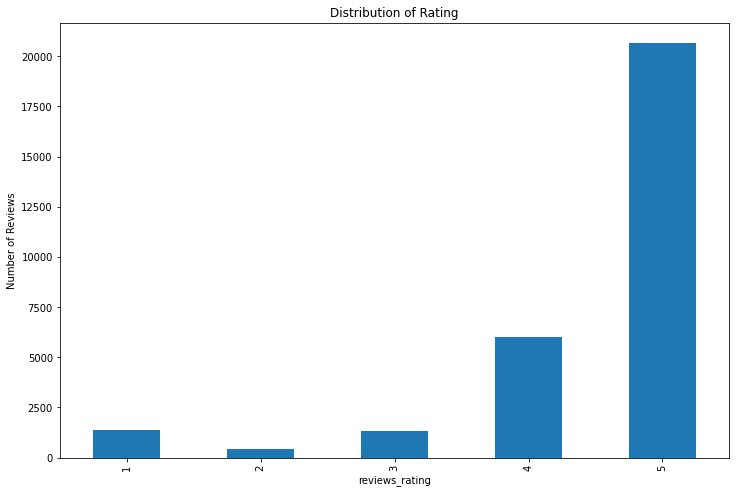

In [24]:
##########################################
## PLOT DISTRIBUTION OF RATING 
##########################################

plt.figure(figsize=(12,8))
# sns.countplot(df['Rating'])
product_reviews_hp4['reviews_rating'].value_counts().sort_index().plot(kind='bar')
plt.title('Distribution of Rating')
plt.xlabel('reviews_rating')
plt.ylabel('Number of Reviews')

In [25]:
##########################################
## DISTRIBUTION OF RATING SCORE
########################################## 

class_counts = product_reviews_hp4.groupby('reviews_rating').size()
class_counts

reviews_rating
1     1368
2      411
3     1332
4     5988
5    20643
dtype: int64

In [26]:
##########################################
# Customer totals for each sentiments
##########################################
product_reviews_hp4['user_sentiment'].value_counts()

Positive    26407
Negative     3335
Name: user_sentiment, dtype: int64

In [27]:
# Statistics of non-numeric variables

# Number of unique customers
print('\nNumber of unique customers : {}'.format(len(product_reviews_hp4['reviews_username'].unique())))
      
# Number of unique products
print('\nNumber of unique products : {}'.format(len(product_reviews_hp4['id'].unique())))
      
# Review number per unique customer
print('\nReview per customer: {}'.format((len(product_reviews_hp4)/len(product_reviews_hp4['reviews_username'].unique()))))      

# Review number per unique product 
print('\nReview per product: {}'.format((len(product_reviews_hp4)/len(product_reviews_hp4['id'].unique()))))


Number of unique customers : 24877

Number of unique products : 269

Review per customer: 1.1955621658560116

Review per product: 110.56505576208178


## Text Preprocessing¶
The following text preprocessing are implemented to convert raw reviews to cleaned review, so that it will be easier for us to do feature extraction in the next step.

In [28]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
from nltk.corpus import stopwords
from bs4 import BeautifulSoup
import unicodedata
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize, sent_tokenize, regexp_tokenize 
from nltk.stem import PorterStemmer, WordNetLemmatizer
import re

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


In [29]:
# calculate raw tokens in order to measure of cleaned tokens

from nltk.tokenize import word_tokenize
raw_tokens=len([w for t in (product_reviews_hp4["review_text"].apply(word_tokenize)) for w in t])
print('Number of raw tokens: {}'.format(raw_tokens))

Number of raw tokens: 1251791


In [30]:
import re, string, unicodedata
import nltk
from bs4 import BeautifulSoup
from nltk import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem.lancaster import LancasterStemmer
from nltk.stem import WordNetLemmatizer

In [31]:
def strip_html(text):
    soup = BeautifulSoup(text, "html.parser")
    return soup.get_text()

def remove_between_square_brackets(text):
    return re.sub('\[[^]]*\]', '', text)

def denoise_text(text):
    text = strip_html(text)
    text = remove_between_square_brackets(text)
    return text

# special_characters removal
def remove_special_characters(text, remove_digits=True):
    pattern = r'[^a-zA-z0-9\s]' if not remove_digits else r'[^a-zA-z\s]'
    text = re.sub(pattern, '', text)
    return text


def remove_non_ascii(words):
    """Remove non-ASCII characters from list of tokenized words"""
    new_words = []
    for word in words:
        new_word = unicodedata.normalize('NFKD', word).encode('ascii', 'ignore').decode('utf-8', 'ignore')
        new_words.append(new_word)
    return new_words

def to_lowercase(words):
    """Convert all characters to lowercase from list of tokenized words"""
    new_words = []
    for word in words:
        new_word = word.lower()
        new_words.append(new_word)
    return new_words


def remove_punctuation_and_splchars(words):
    """Remove punctuation from list of tokenized words"""
    new_words = []
    for word in words:
        new_word = re.sub(r'[^\w\s]', '', word)
        if new_word != '':
            new_word = remove_special_characters(new_word, True)
            new_words.append(new_word)
    return new_words

def replace_numbers(words):
    """Replace all interger occurrences in list of tokenized words with textual representation"""
    p = inflect.engine()
    new_words = []
    for word in words:
        if word.isdigit():
            new_word = p.number_to_words(word)
            new_words.append(new_word)
        else:
            new_words.append(word)
    return new_words

stopword_list= stopwords.words('english')
stopword_list.remove('no')
stopword_list.remove('not')
#stopword_list.remove('headphone')
#stopword_list.remove('headphones')
#stopword_list.remove('earbuds')
#stopword_list.remove('bud')
#stopword_list.remove('ear')
#stopword_list.remove('sony')
#stopword_list.remove('product')


def remove_stopwords(words):
    """Remove stop words from list of tokenized words"""
    new_words = []
    for word in words:
        if word not in stopword_list:
            new_words.append(word)
    return new_words

def stem_words(words):
    """Stem words in list of tokenized words"""
    stemmer = LancasterStemmer()
    stems = []
    for word in words:
        stem = stemmer.stem(word)
        stems.append(stem)
    return stems

def lemmatize_verbs(words):
    """Lemmatize verbs in list of tokenized words"""
    lemmatizer = WordNetLemmatizer()
    lemmas = []
    for word in words:
        lemma = lemmatizer.lemmatize(word, pos='v')
        lemmas.append(lemma)
    return lemmas

def normalize(words):
    words = remove_non_ascii(words)
    words = to_lowercase(words)
    words = remove_punctuation_and_splchars(words)
    words = remove_stopwords(words)
    return words

def lemmatize(words):
    lemmas = lemmatize_verbs(words)
    return lemmas

In [32]:
def normalize_and_lemmaize(input):
    sample = denoise_text(input)   
    sample = remove_special_characters(sample)
    words = nltk.word_tokenize(sample)
    words = normalize(words)
    lemmas = lemmatize(words)
    return ' '.join(lemmas)

In [33]:
product_reviews_hp4['clean_text'] = product_reviews_hp4['review_text'].map(lambda text: normalize_and_lemmaize(text))

In [34]:
product_reviews_hp4

,id,brand,categories,manufacturer,name,reviews_date,reviews_didPurchase,reviews_doRecommend,reviews_rating,reviews_username,user_sentiment,review_text,clean_text
0,AV13O1A8GV-KLJ3akUyj,Universal Music,"Movies, Music & Books,Music,R&b,Movies & TV,Mo...",Universal Music Group / Cash Money,Pink Friday: Roman Reloaded Re-Up (w/dvd),2012-11-30T06:21:45.000Z,True,True,5,joshua,Positive,Just Awesome i love this album. it's very good...,awesome love album good hip hop side current p...
1,AV14LG0R-jtxr-f38QfS,Lundberg,"Food,Packaged Foods,Snacks,Crackers,Snacks, Co...",Lundberg,Lundberg Organic Cinnamon Toast Rice Cakes,2017-07-09T00:00:00.000Z,False,False,5,dorothy w,Positive,Good Good flavor. This review was collected as...,good good flavor review collect part promotion
3,AV16khLE-jtxr-f38VFn,K-Y,"Personal Care,Medicine Cabinet,Lubricant/Sperm...",K-Y,K-Y Love Sensuality Pleasure Gel,2016-01-06T00:00:00.000Z,False,False,1,rebecca,Negative,Disappointed I read through the reviews on her...,disappoint read review look buy one couple lub...
4,AV16khLE-jtxr-f38VFn,K-Y,"Personal Care,Medicine Cabinet,Lubricant/Sperm...",K-Y,K-Y Love Sensuality Pleasure Gel,2016-12-21T00:00:00.000Z,False,False,1,walker557,Negative,Irritation My husband bought this gel for us. ...,irritation husband buy gel us gel cause irrita...
5,AV16khLE-jtxr-f38VFn,K-Y,"Personal Care,Medicine Cabinet,Lubricant/Sperm...",K-Y,K-Y Love Sensuality Pleasure Gel,2016-04-20T00:00:00.000Z,False,False,1,samantha,Negative,Not worth it My boyfriend and I bought this to...,not worth boyfriend buy spice things bedroom h...
...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,AVpfW8y_LJeJML437ySW,L'oreal Paris,"Beauty,Hair Care,Shampoo & Conditioner,Holiday...",L'oreal Paris,L'or233al Paris Elvive Extraordinary Clay Reba...,2017-01-23T00:00:00.000Z,False,True,5,laurasnchz,Positive,Softness!! I got this conditioner with Influen...,softness get conditioner influenster try im lo...
29996,AVpfW8y_LJeJML437ySW,L'oreal Paris,"Beauty,Hair Care,Shampoo & Conditioner,Holiday...",L'oreal Paris,L'or233al Paris Elvive Extraordinary Clay Reba...,2017-01-27T00:00:00.000Z,False,True,5,scarlepadilla,Positive,"I love it I love it , I received this for revi...",love love receive review purpose influenster l...
29997,AVpfW8y_LJeJML437ySW,L'oreal Paris,"Beauty,Hair Care,Shampoo & Conditioner,Holiday...",L'oreal Paris,L'or233al Paris Elvive Extraordinary Clay Reba...,2017-01-21T00:00:00.000Z,False,True,5,liviasuexo,Positive,Hair is so smooth after use First of all I lov...,hair smooth use first love smell product wash ...
29998,AVpfW8y_LJeJML437ySW,L'oreal Paris,"Beauty,Hair Care,Shampoo & Conditioner,Holiday...",L'oreal Paris,L'or233al Paris Elvive Extraordinary Clay Reba...,2017-01-11T00:00:00.000Z,False,True,5,ktreed95,Positive,Perfect for my oily hair! I received this thro...,perfect oily hair receive influenster never go...


In [35]:
product_reviews_hp4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29742 entries, 0 to 29999
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   id                   29742 non-null  object
 1   brand                29742 non-null  object
 2   categories           29742 non-null  object
 3   manufacturer         29742 non-null  object
 4   name                 29742 non-null  object
 5   reviews_date         29742 non-null  object
 6   reviews_didPurchase  29742 non-null  object
 7   reviews_doRecommend  29742 non-null  object
 8   reviews_rating       29742 non-null  int64 
 9   reviews_username     29742 non-null  object
 10  user_sentiment       29742 non-null  object
 11  review_text          29742 non-null  object
 12  clean_text           29742 non-null  object
dtypes: int64(1), object(12)
memory usage: 3.2+ MB


In [36]:
# Let's put aside number of raw tokens in order to measure of cleaned tokens
from nltk.tokenize import word_tokenize
clean_tokens=len([w for t in (product_reviews_hp4["clean_text"].apply(word_tokenize)) for w in t])
#clean_tokens=len((product_reviews_hp4["clean_text"]))
print('Number of clean tokens: {}\n'.format(clean_tokens))
print('Percentage of removed tokens: {0:.2f}'.format(1-(clean_tokens/raw_tokens)))

Number of clean tokens: 589206

Percentage of removed tokens: 0.53


In [37]:
product_reviews_hp4.to_csv('data/clean_review.csv', sep=',', encoding='utf-8', index = False)